# Dependencies

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Data Preprocesing for Logistic Regression

In [4]:
# Read the scaled images into Jupyter Notebook and create DataFrame
file_path = r'ENTER_YOUR_CSV_FILE_PATH_HERE'
df = pd.read_csv(file_path)

In [5]:
# Confirm all images are listed in df
len(df)

6006

In [6]:
# Define the list of healthy labels
healthy_labels = ['Tomato_healthy']

# Create the 'healthy?' column based on healthy labels
df['healthy?'] = df['label'].isin(healthy_labels).astype(int)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,label,healthy?
0,0.509069,0.543782,0.203630,0.514034,0.551566,0.209897,0.548410,0.588554,0.248520,0.469272,...,-0.374229,-0.528024,-0.373123,-0.385091,-0.575035,-0.320599,-0.327442,-0.523437,Tomato_Bacterial_spot,0
1,-0.645186,-0.750117,-1.108201,-0.685108,-0.792221,-1.150344,-0.613734,-0.722766,-1.081046,-0.543298,...,1.384871,1.093676,1.228654,1.456097,1.158420,1.226318,1.451978,1.154496,Tomato_Bacterial_spot,0
2,-0.760612,-0.635949,-1.070720,-0.723790,-0.600252,-1.036991,-0.807425,-0.684198,-1.119034,-0.815913,...,1.416855,1.063078,1.107765,1.423795,1.127465,0.923001,1.225506,0.968059,Tomato_Bacterial_spot,0
3,0.855345,1.038508,0.728362,0.900854,1.089081,0.776664,0.780838,0.974236,0.666383,0.663997,...,0.233460,-0.069052,0.019766,0.099432,-0.172626,-0.017282,0.060795,-0.243782,Tomato_Bacterial_spot,0
4,1.163147,1.190731,0.840805,1.132946,1.165869,0.852233,1.129481,1.167078,0.894308,1.092392,...,-0.566130,-0.803407,-0.403345,-0.643503,-0.884581,-0.290267,-0.489207,-0.740947,Tomato_Bacterial_spot,0


In [7]:
# Confirm binary value is correct
df.loc[df['label'] == 'Tomato_healthy'].head(5)

,0,1,2,3,4,5,6,7,8,9,...,2344,2345,2346,2347,2348,2349,2350,2351,label,healthy?
334,-0.914512,-0.712061,-0.808354,-1.033246,-0.792221,-0.885853,-1.001115,-0.761334,-0.853120,-0.815913,...,-1.141836,-1.078790,-1.279789,-1.128026,-1.039353,-1.382209,-1.265681,-1.175966,Tomato_healthy,1
335,0.124317,0.163223,-0.021255,0.165896,0.206021,0.020975,0.354719,0.395713,0.210532,0.313492,...,-1.717541,-1.782547,-1.823789,-1.709454,-1.782263,-1.867516,-1.750977,-1.828496,Tomato_healthy,1
336,-0.414335,-0.445670,-0.283622,-0.453016,-0.485070,-0.205732,-0.536258,-0.529925,-0.283307,-0.582243,...,1.097018,1.246667,1.137987,1.229986,1.282238,1.044328,1.128447,1.185569,Tomato_healthy,1
337,-0.876037,-0.864285,-0.583469,-0.878518,-0.907403,-0.583577,-0.962377,-1.031312,-0.701170,-1.049583,...,1.384871,1.491452,1.168210,1.391494,1.498920,1.256650,1.484331,1.589516,Tomato_healthy,1
338,0.778395,0.772117,0.728362,0.746126,0.743535,0.701095,0.432195,0.434281,0.400470,0.352437,...,-0.406212,-0.222043,-0.161568,-0.352789,-0.172626,-0.017282,-0.198029,0.004801,Tomato_healthy,1


In [8]:
# Save new CSV file with binary healthy / not healthy column
file_path = r'ENTER_YOUR_CSV_FILE_PATH_HERE'
df.to_csv(file_path, index=False)

# Fit Model and Make Predictions

In [9]:
# Read the scaled images into Jupyter Notebook and create DataFrame
file_path = r'ENTER YOUR FILE PATH HERE'
df = pd.read_csv(file_path)

In [10]:
# Remove label for logistic regression model
df = df.drop('label', axis=1)

In [11]:
# Separate features and labels
X = df.drop('healthy?', axis=1).values
y = df['healthy?'].values 

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(random_state=1,  max_iter=2000)
model

LogisticRegression(max_iter=2000, random_state=1)

In [14]:
# Fit the model using training data
logreg = model.fit(X_train, y_train)

In [15]:
# Make a prediction using test data
predictions = logreg.predict(X_test)

In [16]:
# Generate a confusion matrix for the model
matrix = confusion_matrix(y_test, predictions)
matrix = pd.DataFrame(matrix,
                     index = ['Actual Unhealthy', 'Actual Healthy'],
                     columns = ['Predicted Unhealthy', 'Predicted Healthy'])
matrix

,Predicted Unhealthy,Predicted Healthy
Actual Unhealthy,735,14
Actual Healthy,26,727


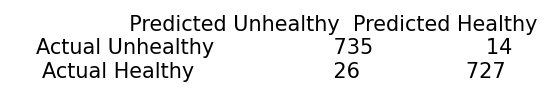

In [22]:
#Export confusion matrix to chart visual
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 1))
ax.axis('off')
ax.text(0.5, 0.5, matrix, fontsize=15, ha='center', va='center')
plt.savefig('..\Output\even_confusion_matrix_text.png',  dpi=300, bbox_inches='tight')
plt.show()

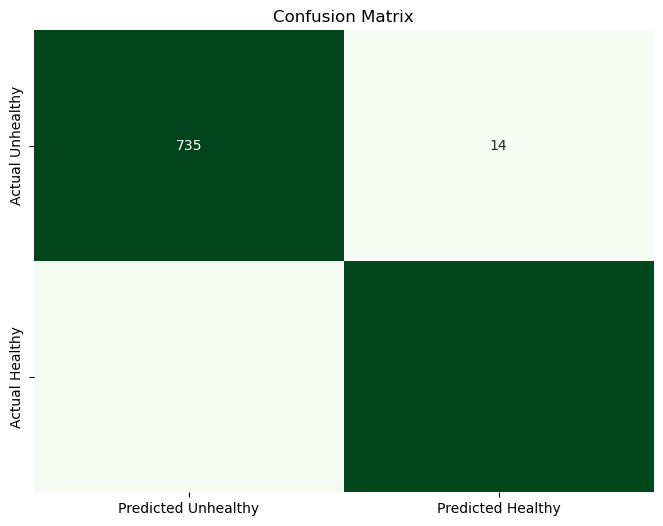

In [23]:
# Visualize confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.savefig('..\Output\even_confusion_matrix.png',  dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Print the classification report for the model
target_names  = ["Unhealthy (0)", "Healthy (1)"]
report = classification_report(y_test, predictions, target_names  = target_names)

# Print the training classification report
print(report)

               precision    recall  f1-score   support

Unhealthy (0)       0.97      0.98      0.97       749
  Healthy (1)       0.98      0.97      0.97       753

     accuracy                           0.97      1502
    macro avg       0.97      0.97      0.97      1502
 weighted avg       0.97      0.97      0.97      1502



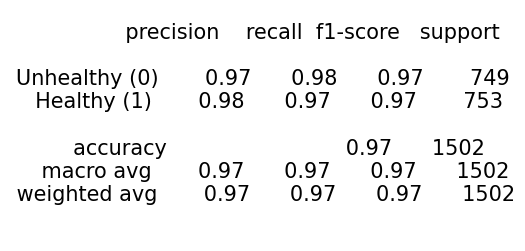

In [25]:
# Visualize classification report
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('off')
ax.text(0.5, 0.5, report, fontsize=15, ha='center', va='center')
plt.savefig('..\Output\even_classification_report.png',  dpi=300, bbox_inches='tight')
plt.show()